In [1]:
begin #=Variables used in the construction of the local matrices=#
    using SymPy
    using Plots
    using LinearAlgebra
    x,a,b = Sym("x,a,b")
    end;

In [2]:
begin #=First-order Lagrange polynomials for a general finite element Ω (on the interval [-1,1])=#
    pa(x) = subs(((x-b)/(a-b)),(a,-1),(b,1)) #=Negative angular coefficient=#
    pb(x) = subs(((x-a)/(b-a)),(a,-1),(b,1)) #=Positive angular coefficient=#
    dpa = diff(pa(x),x) #=Derivatives=#
    dpb = diff(pb(x),x)
    end;

In [3]:
begin #=Local matrix Aᵢⱼᵉ=∫Φ'ᵢ(x)Φ'ⱼ(x)dx in Ωᵉ=#
    a1 = integrate(dpa*dpa,(x,-1,1))
    a2 = integrate(dpa*dpb,(x,-1,1))
    a3 = integrate(dpb*dpa,(x,-1,1))
    a4 = integrate(dpb*dpb,(x,-1,1))
    Ae = [a1 a2; a3 a4]
end

2×2 Matrix{Sym}:
  1/2  -1/2
 -1/2   1/2

In [4]:
begin #=Local matrix Cᵢⱼᵉ=∫Φᵢ(x)Φⱼ(x)dx in Ωᵉ=#
    c1 = integrate(pa(x)*pa(x),(x,-1,1))
    c2 = integrate(pa(x)*pb(x),(x,-1,1))
    c3 = integrate(pb(x)*pa(x),(x,-1,1))
    c4 = integrate(pb(x)*pb(x),(x,-1,1))
    Ce = [c1 c2; c3 c4]
end

2×2 Matrix{Sym}:
 2/3  1/3
 1/3  2/3

In [16]:
begin 
    Nn = 20 #=Number of nodes=#
    L = 1 #=Length of relaxed string=#
    X = LinRange(0,L,Nn)
    E = 1:Nn
    LM = [0 0]
    for e in E
        LM = [LM;[e e+1]]
    end
    LM = LM[2:end-1,:] #=Vector indentifying the Nn-1 finite elements=#
end

19×2 Matrix{Int64}:
  1   2
  2   3
  3   4
  4   5
  5   6
  6   7
  7   8
  8   9
  9  10
 10  11
 11  12
 12  13
 13  14
 14  15
 15  16
 16  17
 17  18
 18  19
 19  20

In [6]:
begin #=Contructing global matrix Aᵢⱼ=∫Φ'ᵢ(x)Φ'ⱼ(x)dx=#
    he = X[2]-X[1] #=Spatial step Δx=#
    A = zeros((Nn,Nn))
    for e in 1:(Nn-1)
        globalP = LM[e,:]
        localP = globalP.-(e-1)
        g_i = globalP[1]
        g_j = globalP[2]
        l_i = localP[1]
        l_j = localP[2]
        A[g_i,g_i] += 2*Ae[l_i,l_i]/he 
        A[g_i,g_j] += 2*Ae[l_i,l_j]/he
        A[g_j,g_i] += 2*Ae[l_j,l_i]/he
        A[g_j,g_j] += 2*Ae[l_j,l_j]/he
    end
    A 
end

20×20 Matrix{Float64}:
  19.0  -19.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
 -19.0   38.0  -19.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0  -19.0   38.0  -19.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0  -19.0   38.0  -19.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0  -19.0   38.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0  -19.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0 

In [7]:
begin #=Contructing global matrix Cᵢⱼ=∫Φᵢ(x)Φⱼ(x)dx=#
    C = zeros((Nn,Nn))
    for e in 1:(Nn-1)
        globalP = LM[e,:]
        localP = globalP.-(e-1)
        g_i = globalP[1]
        g_j = globalP[2]
        l_i = localP[1]
        l_j = localP[2]
        C[g_i,g_i] += he*Ce[l_i,l_i]/2 
        C[g_i,g_j] += he*Ce[l_i,l_j]/2
        C[g_j,g_i] += he*Ce[l_j,l_i]/2
        C[g_j,g_j] += he*Ce[l_j,l_j]/2
    end
    C
end

20×20 Matrix{Float64}:
 0.0175439   0.00877193  0.0         …  0.0         0.0         0.0
 0.00877193  0.0350877   0.00877193     0.0         0.0         0.0
 0.0         0.00877193  0.0350877      0.0         0.0         0.0
 0.0         0.0         0.00877193     0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         

In [8]:
begin #=Constructing matrix on the left-hand side of (11) (see LaTeX)=#
    Cl = C #=Index l for "left"=#
    Cl[1,1] = 1 #=Imposing boundary conditions=#
    Cl[1,2] = 0
    Cl[2,1] = 0
    Cl[end,end] = 1
    Cl[end,end-1] = 0
    Cl[end-1,end] = 0
    Ml = [Cl zeros((Nn,Nn)); zeros((Nn,Nn)) Cl]
    Ml
end

40×40 Matrix{Float64}:
 1.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.0350877   0.00877193  0.0            0.0         0.0         0.0
 0.0  0.00877193  0.0350877   0.00877193     0.0         0.0         0.0
 0.0  0.0         0.00877193  0.0350877      0.0         0.0         0.0
 0.0  0.0         0.0         0.00877193     0.0         0.0         0.0
 0.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 0.0  0.0         0.0         0.0            0.0         0.0         0.0
 ⋮                          

In [9]:
begin #=Constructing matrix on the right-hand side of (11) (see LaTeX)=#
    c = 1 #=speed of sound=#
    Cr = C #=Index r for "right"=#
    Cr[1,1] = 0
    Cr[1,2] = 0
    Cr[2,1] = 0
    Cr[end,end] = 0
    Cr[end,end-1] = 0
    Cr[end-1,end] = 0
    Ar = A #=Index r for "right"=#
    Ar[1,1] = 0
    Ar[1,2] = 0
    Ar[2,1] = 0
    Ar[end,end] = 0
    Ar[end,end-1] = 0
    Ar[end-1,end] = 0
    Mr = [zeros((Nn,Nn)) Cr; -(c^2).*Ar zeros((Nn,Nn))]
    Mr
end

40×40 Matrix{Float64}:
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0
  

In [10]:
begin #=Constructing matrix M (see equation (19) in LaTeX)=#
    M = inv(Ml)*Mr
    M
end

40×40 Matrix{Float64}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.0           0.0              1.46297e-26  -1.90295e-26  0.0
 0.0   0.0           0.0             -5.85187e-26   7.61181e-26  0.0
 0.0   0.0           0.0             -1.3068e-24    1.49462e-25  0.0
 0.0   0.0           0.0             -1.79338e-24  -5.56056e-25  0.0
 0.0   0.0           0.0          …   1.38388e-23   2.41579e-24  0.0
 0.0   0.0           0.0              8.05066e-23   3.08588e-23  0.0
 0.0   0.0           0.0              2.49523e-24  -9.58982e-23  0.0
 0.0   0.0           0.0             -7.75103e-22   2.87721e-22  0.0
 0.0   0.0           0.0             -2.28659e-21  -6.76048e-22  0.0
 0.0   0.0           0.0          …   1.54755e-20   9.15589e-22  0.0
 0.0   0.0           0.0             -2.40846e-20  -1.47057e-21  0.0
 0.0   0.0           0.0             -1.05366e-19   1.22185e-20  0.0
 ⋮                                ⋱                              
 0.0   0.34532

In [11]:
begin #=Constructing the Crank-Nicolson matrix CK used for time evolution=#
    T = LinRange(0,2,100) #=Time discretization=#
    Δt = 2/(100-1) #=Time step=#
    CK = inv(I-M.*(Δt/2))*(I+M.*(Δt/2)) 
    CK
end

40×40 Matrix{Float64}:
 1.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.77585       0.143368        -1.07154e-14   1.88022e-15  0.0
 0.0   0.143368      0.749882         6.10926e-14  -1.07202e-14  0.0
 0.0  -0.0259675     0.148071        -3.37725e-13   5.92204e-14  0.0
 0.0   0.00470338   -0.0268194        1.8646e-12   -3.27004e-13  0.0
 0.0  -0.000851901   0.00485768   …  -1.02946e-11   1.8054e-12   0.0
 0.0   0.000154301  -0.000879849      5.68367e-11  -9.9676e-12   0.0
 0.0  -2.79478e-5    0.000159363     -3.13798e-10   5.50313e-11  0.0
 0.0   5.06206e-6   -2.88647e-5       1.73249e-9   -3.0383e-10   0.0
 0.0  -9.16868e-7    5.22813e-6      -9.56513e-9    1.67746e-9   0.0
 0.0   1.66068e-7   -9.46948e-7   …   5.28094e-8   -9.2613e-9    0.0
 0.0  -3.00792e-8    1.71516e-7      -2.91563e-7    5.1132e-8    0.0
 0.0   5.4481e-9    -3.1066e-8        1.60973e-6   -2.82301e-7   0.0
 ⋮                                ⋱                              
 0.0   0.00050

In [12]:
begin #=Initial condition=#
    function gaussian(x,μ,σ)#=Gaussian packet with mean μ and variance σ²=#
        exp(-(x-μ)^2/(2σ)^2)
    end
    u0 = gaussian.(X,L/2,L/20).-gaussian(0,L/2,L/20) #=Initial position=#
    p0 = zeros(Nn) #=Initial velocity=#
    end;

In [13]:
begin #=Time evolution=#
    sol = zeros(length(T),2*Nn)
    sol[1,:] += [u0;p0]
    for t in 1:length(T)-1
        sol[t+1,:] += CK*sol[t,:]
    end
end

┌ Info: Saved animation to 
│   fn = c:\Users\lucasmr\dev\WeirdGuitarFem\constant_c_wave.gif
└ @ Plots C:\Users\lucasmr\.julia\packages\Plots\CoJwR\src\animation.jl:104


Plots.AnimatedGif("c:\\Users\\lucasmr\\dev\\WeirdGuitarFem\\constant_c_wave.gif")
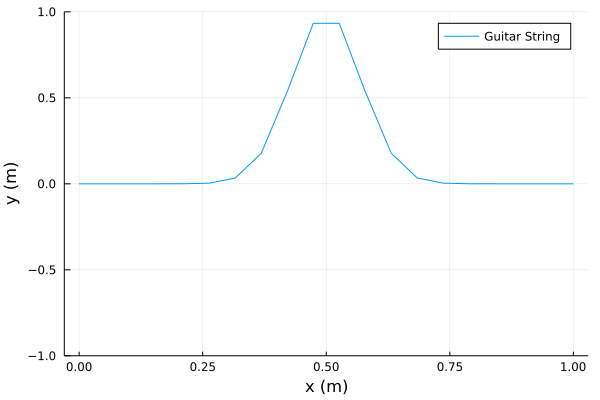

In [14]:
begin #=Plotting results=#
    anim = @animate for i = 1:length(T)
    plot(X,sol[i,1:Nn],ylims=(-1,1),label="Guitar String")
    xlabel!("x (m)")
    ylabel!("y (m)")
        end
 
gif(anim, "constant_c_wave.gif", fps = 30)
end

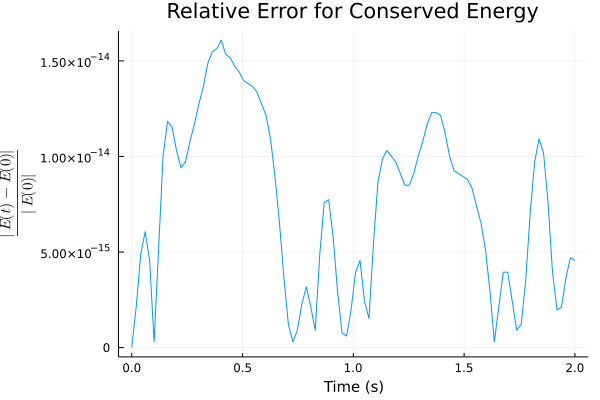

In [15]:
function energy(sol,T,C,A,c) #=Calculates total energy and plots relative error=#
    U = sol[:,1:Nn] #=Position=#
    P = sol[:,Nn+1:end] #=Velocity=#
    E = zeros(length(T))
    E0 = 1/2*1/c^2*(transpose(P[1,:])*C*P[1,:])+1/2*(transpose(U[1,:])*A*U[1,:]) #=Initial energy=#
    E[1] += E0
    for t in 2:length(T)
        E[t] += 1/2*1/c^2*(transpose(P[t,:])*C*P[t,:])+1/2*(transpose(U[t,:])*A*U[t,:]) #=Energy=#
    end
    Erel = abs.((E.-E0)./E0) #=Relative error=#
    plot(T,Erel,title="Relative Error for Conserved Energy",label="")
    xlabel!("Time (s)")
    ylabel!("\$\\frac{|E(t)-E(0)|}{|E(0)|}\$",guidefontsize=10)
end

energy(sol,T,C,A,c)#=Arguments: solution vector sol, time grid T, FEM matrix functions C, FEM matrix derivatives A, speed of sound c=#